In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report, accuracy_score

/home/drueda/.anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
def get_summary(dist, network, split):
    path = f'{dist}/figures/{network}_{split}.csv'
    df = pd.read_csv(path)
    precision = round(precision_score(df.true, df.pred, average='weighted'), 2)
    recall = round(recall_score(df.true, df.pred), 2)
    accuracy = round(accuracy_score(df.true, df.pred), 2)
    
    report = classification_report(df.true, df.pred, output_dict=True)
    precision = round(report['0']['precision'], 2)
    recall = round(report['0']['recall'], 2)
    accuracy = round(report['accuracy'], 2)
    
    return network, split, precision, recall, accuracy

In [63]:
for network in ('vgg16','vgg19','inceptionV3','xception','resnet50'):
    for split in ('val','test'):
        print(get_summary('d3', network, split))

('vgg16', 'val', 0.92, 0.8, 0.83)
('vgg16', 'test', 0.88, 0.82, 0.79)
('vgg19', 'val', 0.9, 0.84, 0.84)
('vgg19', 'test', 0.9, 0.81, 0.8)
('inceptionV3', 'val', 0.88, 0.74, 0.77)
('inceptionV3', 'test', 0.91, 0.82, 0.82)
('xception', 'val', 0.83, 0.84, 0.79)
('xception', 'test', 0.87, 0.86, 0.81)
('resnet50', 'val', 0.81, 0.86, 0.78)
('resnet50', 'test', 0.81, 0.87, 0.77)


In [31]:
def get_cm(network, split):
    path_1 = f'd1/figures/{network}_{split}.csv'
    path_2 = f'd2/figures/{network}_{split}.csv'
    path_3 = f'd3/figures/{network}_{split}.csv'
    
    df1 = pd.read_csv(path_1)
    df2 = pd.read_csv(path_2)
    df3 = pd.read_csv(path_3)
    
    cm1 = confusion_matrix(df1.true, df1.pred)
    cm2 = confusion_matrix(df2.true, df2.pred)
    cm3 = confusion_matrix(df3.true, df3.pred)
    
    # All items add up to 100%
    cm = (cm1 + cm2 + cm3)//3
    cm_100 = cm / cm.sum()
    
    plt.figure(figsize=(4,4))
    ax = sns.heatmap(cm_100, cmap='Blues', annot=True, fmt='.0%', cbar=False, annot_kws={'size':18})
    ax.set_ylabel('Prediction', fontsize=16);
    ax.set_xlabel('Actual', fontsize=16); 
    ax.set_xticklabels([], fontsize=14)
    ax.set_yticklabels([], fontsize=14)
    ax.tick_params(axis='both', which='both', length=0)

    plt.text(0.5,-0.1, "Flexible", horizontalalignment='center', fontsize=14)
    plt.text(1.5,-0.1, "Rigid", horizontalalignment='center', fontsize=14)

    plt.text(2.2,0.3, "Flexible", horizontalalignment='center', rotation="vertical", fontsize=14)
    plt.text(2.2,1.5-.1, "Rigid", horizontalalignment='center', rotation="vertical", fontsize=14)
    plt.show()
    
    # All rows add up to 100%
    cm = (cm1 + cm2 + cm3)//3
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(4,4))
    ax = sns.heatmap(cm_norm, cmap='Blues', annot=True, fmt='.0%', cbar=False, annot_kws={'size':18})
    ax.set_ylabel('Prediction', fontsize=16);
    ax.set_xlabel('Actual', fontsize=16); 
    ax.set_xticklabels([], fontsize=14)
    ax.set_yticklabels([], fontsize=14)
    ax.tick_params(axis='both', which='both', length=0)

    plt.text(0.5,-0.1, "Flexible", horizontalalignment='center', fontsize=14)
    plt.text(1.5,-0.1, "Rigid", horizontalalignment='center', fontsize=14)

    plt.text(2.2,0.3, "Flexible", horizontalalignment='center', rotation="vertical", fontsize=14)
    plt.text(2.2,1.5-.1, "Rigid", horizontalalignment='center', rotation="vertical", fontsize=14)
    plt.show()
    
    

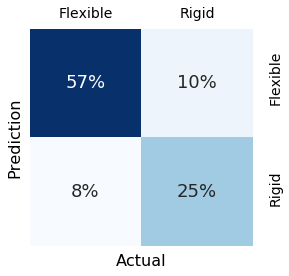

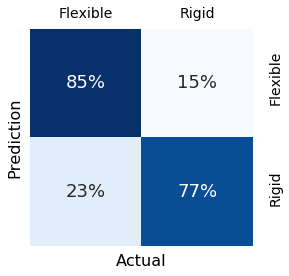

In [32]:
get_cm('vgg19', 'test')